# K-mean Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('15.1Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
x=data.iloc[:,[3,4]].values #thus we deal with unsupervised learning we have no value of y due to unknown data

In [5]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

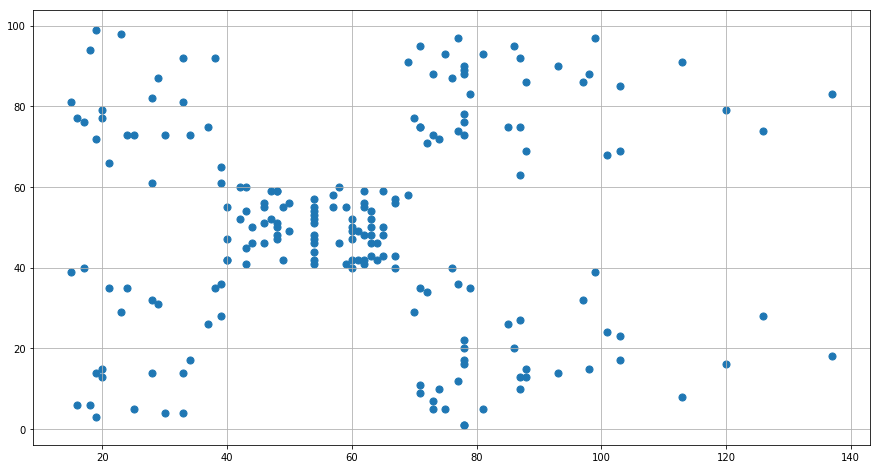

In [6]:
plt.figure(figsize=(15,8))
plt.scatter(x[:,0],x[:,1],marker='o',s=50)
plt.grid()
plt.show()

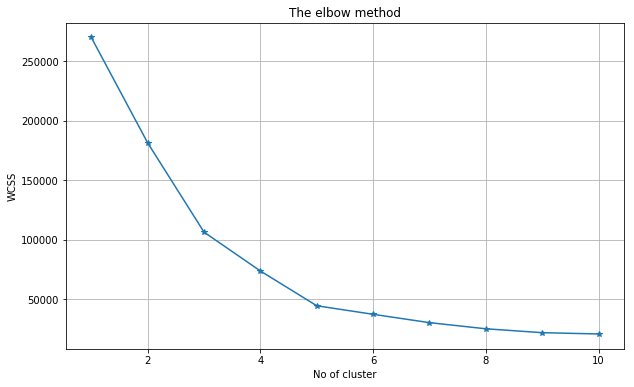

In [7]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,max_iter=300, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))   
plt.plot(range(1,11),wcss,marker='*')
plt.title('The elbow method')
plt.xlabel('No of cluster')
plt.ylabel('WCSS')

plt.grid()
plt.show()

In [8]:
pd.DataFrame(wcss,index=range(1,11))

,0
1,269981.280000
2,181363.595960
3,106348.373062
4,73679.789039
5,44448.455448
6,37265.865205
7,30259.657207
8,25095.703210
9,21830.041978
10,20736.679939


In [16]:
kmeans=KMeans(n_clusters=5,max_iter=300, init='k-means++', n_init=10, random_state=0)

In [17]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [18]:
y_kmeans=kmeans.predict(x)

In [19]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

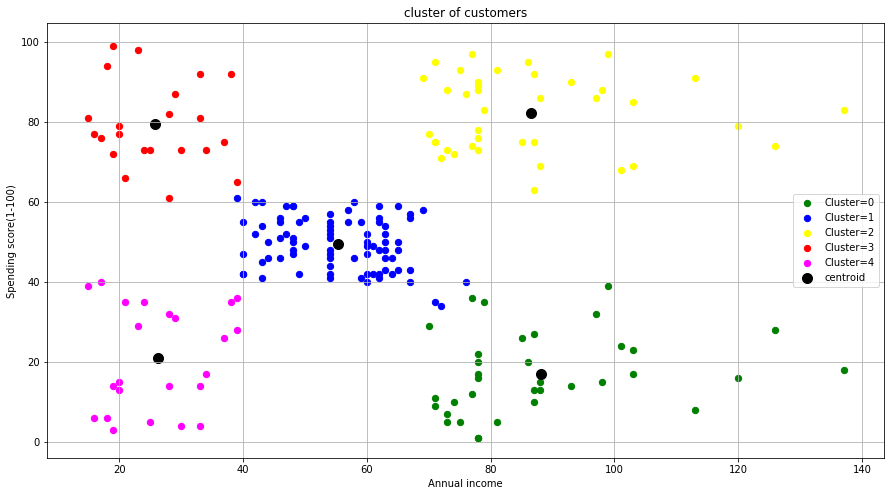

In [20]:
plt.figure(figsize=(15,8))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=40,c='green',label='Cluster=0')

plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=40,c='blue',label='Cluster=1')

plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=40,c='yellow',label='Cluster=2')

plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=40,c='red',label='Cluster=3')

plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=40,c='magenta',label='Cluster=4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroid')
plt.title('cluster of customers')
plt.xlabel('Annual income')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.grid()
plt.show()